In [1]:
using BasisFunctions
using FrameFuns
using PyPlot
using Interact, Reactive

  likely near /Users/roelmatthysen/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /Users/roelmatthysen/.julia/v0.4/Interact/src/IJulia/setup.jl:157


### One-dimensional approximations

In [2]:
f1 = ExpFun( x-> x)

A 1-dimensional FrameFun with 61 degrees of freedom.
Basis: Fourier series, mapped to [ -2.0  ,  2.0 ]
Domain: the interval [-1.0, 1.0]


 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in require at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/roelmatthysen/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /U

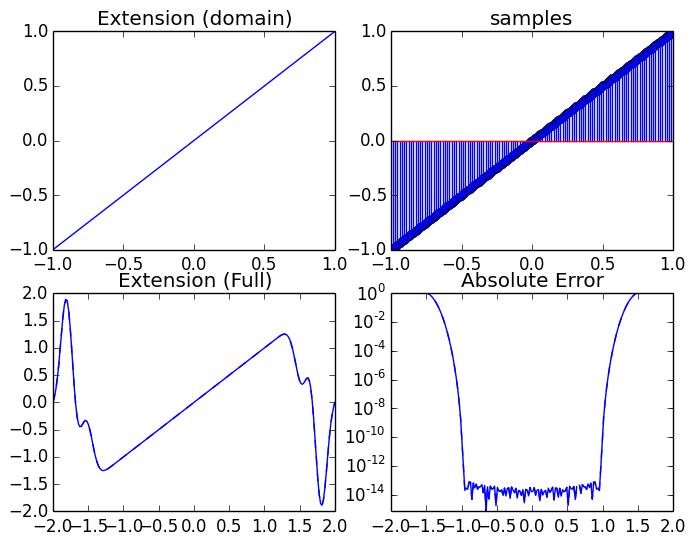

PyObject <matplotlib.text.Text object at 0x3198aa790>

In [3]:
subplot(221); FrameFuns.plot(f1)
subplot(222); plot_samples(f1)
subplot(223); plot_expansion(f1)
subplot(224); plot_error(f1, x->x)

In [4]:
f1(0.5)

0.5000000000000233 - 3.6559644200906405e-13im

In [5]:
f2 = ExpFun( x-> cos(50*x), Interval(-1.0,1.0), n=71)

A 1-dimensional FrameFun with 71 degrees of freedom.
Basis: Fourier series, mapped to [ -2.0  ,  2.0 ]
Domain: the interval [-1.0, 1.0]


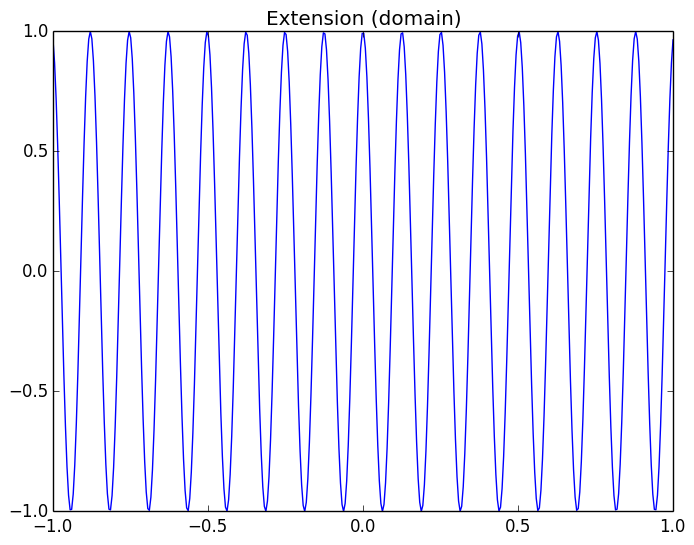

PyObject <matplotlib.text.Text object at 0x319d3d050>

In [6]:
FrameFuns.plot(f2,n=400)

In [7]:
f3 = ChebyFun(x -> cos(10*x.^2),Interval(-1.0,1.0), n=41,T=1.1)

A 1-dimensional FrameFun with 41 degrees of freedom.
Basis: Chebyshev series (first kind), mapped to [ -1.0975609756097562  ,  1.0975609756097562 ]
Domain: the interval [-1.0, 1.0]


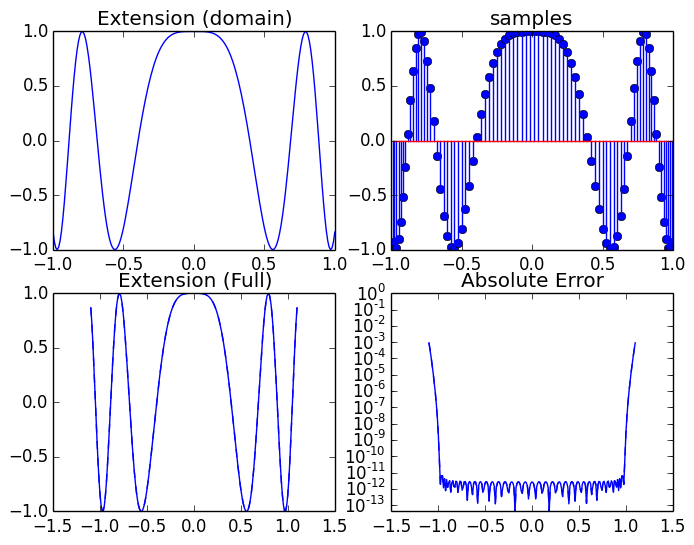

PyObject <matplotlib.text.Text object at 0x31a4315d0>

In [8]:
subplot(221); FrameFuns.plot(f3)
subplot(222); plot_samples(f3)
subplot(223); plot_expansion(f3)
subplot(224); plot_error(f3, x->cos(10*x.^2))

Interact.Slider{Float64}([Reactive.Input{Float64}] 2.0,"myT",2.0,1.0:0.05:3.0)

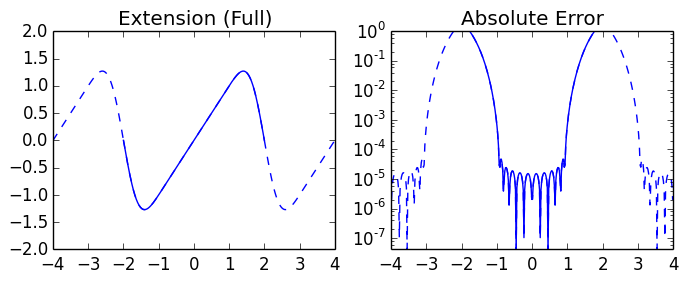

In [9]:
h=figure()
@manipulate for myT=1.0:0.05:3.0; withfig(h) do
        F=ExpFun(x->x,T=myT,n=11)
        subplot(221); plot_expansion(F,repeats=1); xlim([-4; 4]); ylim([-2; 2])
        subplot(222); plot_error(F, x->x,repeats=1); xlim([-4; 4]); ylim([-10^16; 1])
    end
end

### 2D approximations

##### Simple domains and simple functions

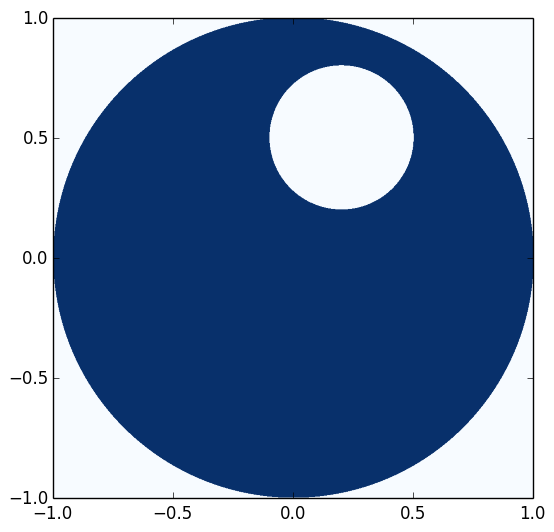

PyObject <matplotlib.image.AxesImage object at 0x31aa4ced0>

In [10]:
C = Disk(1.0)- Disk(0.3,[0.2; 0.5]); FrameFuns.plot_domain(C, n=1000)

In [11]:
f(x,y) = exp(x+y)

f (generic function with 1 method)

In [12]:
f2 = ExpFun(f,C)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -2.0  ,  2.0 ] x Fourier series, mapped to [ -2.0  ,  2.0 ])
Domain: the difference of two domains: 
    First domain: a domain described by a characteristic function
    Second domain: a domain described by a characteristic function



In [13]:
f2(-0.6, 0.4)

0.818730753076506 - 5.488387522234461e-13im

In [14]:
exp(-0.6+0.4)

0.8187307530779819

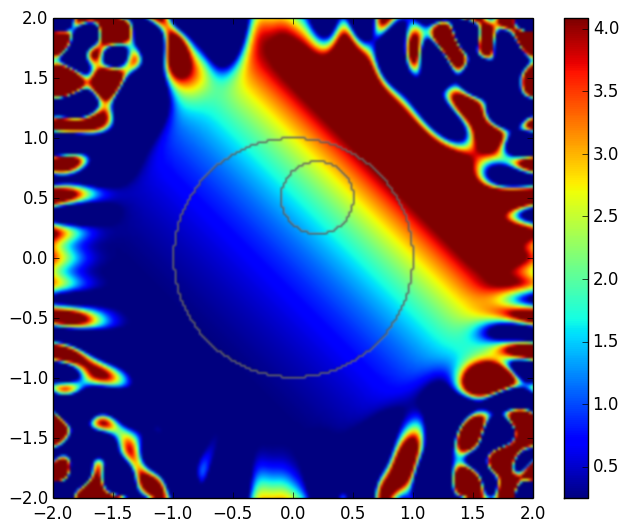

PyObject <matplotlib.colorbar.Colorbar instance at 0x31a8f6ef0>

In [15]:
plot_image(f2,n=200)

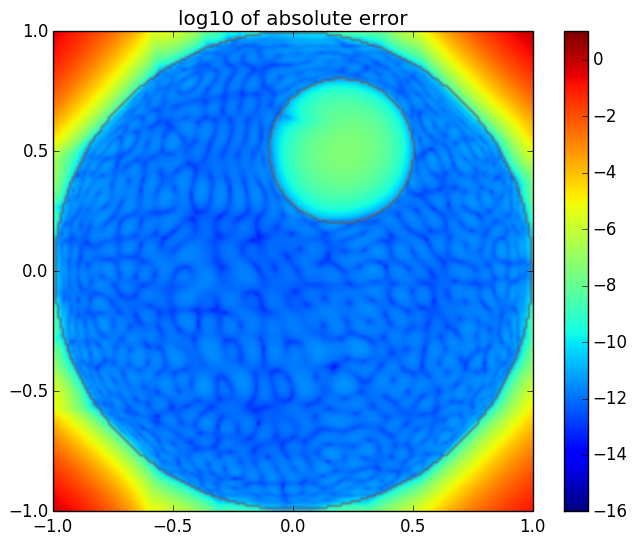

PyObject <matplotlib.text.Text object at 0x31ac78f50>

In [16]:
plot_error(f2,f)

##### Simple domains and harder functions

In [17]:
dom = FrameFuns.randomcircles(10)

a collection of 10 domains

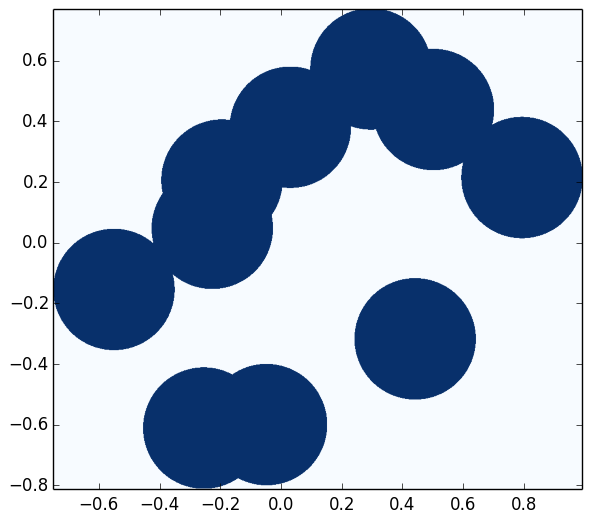

In [18]:
FrameFuns.plot_domain(dom,n=1000);

In [19]:
f2 = ExpFun( (x,y) -> cos(40*(x+y)), dom, n=(31,31), T=(1.2,1.2))

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -0.9208169600081537  ,  1.1607925889254085 ] x Fourier series, mapped to [ -0.9668950418460204  ,  0.9226426956241885 ])
Domain: a collection of 10 domains


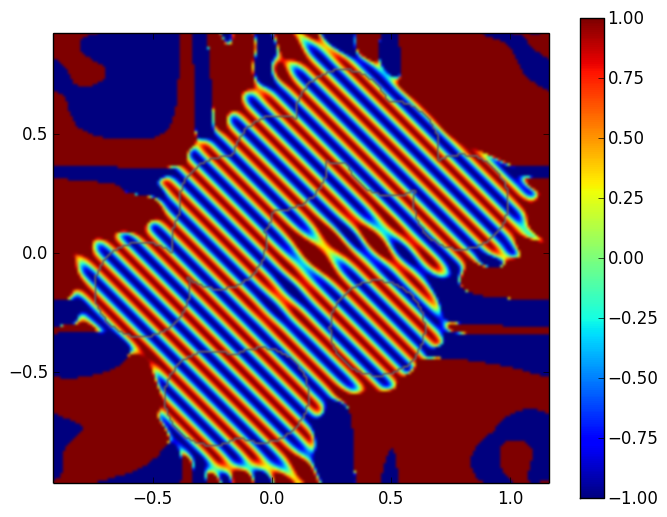

PyObject <matplotlib.colorbar.Colorbar instance at 0x3199f7170>

In [20]:
plot_image(f2,n=200)

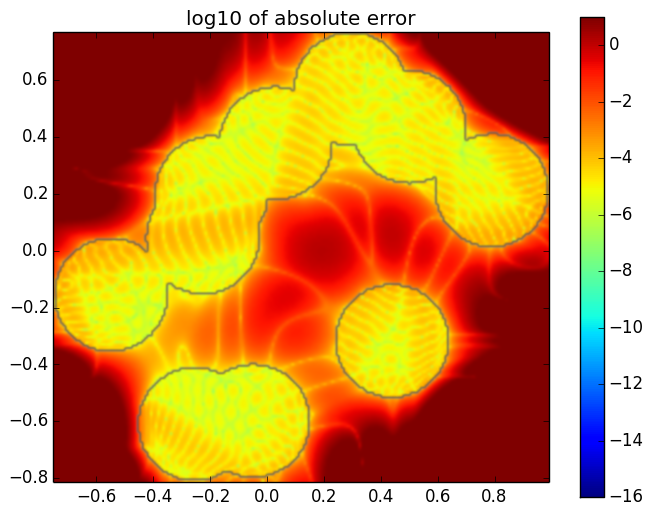

PyObject <matplotlib.text.Text object at 0x31bdce290>

In [21]:
plot_error(f2, (x,y) -> cos(40*(x+y)))

In [22]:
FrameFuns.BBox2

FrameFuns.BBox{2,T}

##### Fractal domains

In [23]:
mandelbrot=FrameFuns.Mandelbrot()

The Mandelbrot set

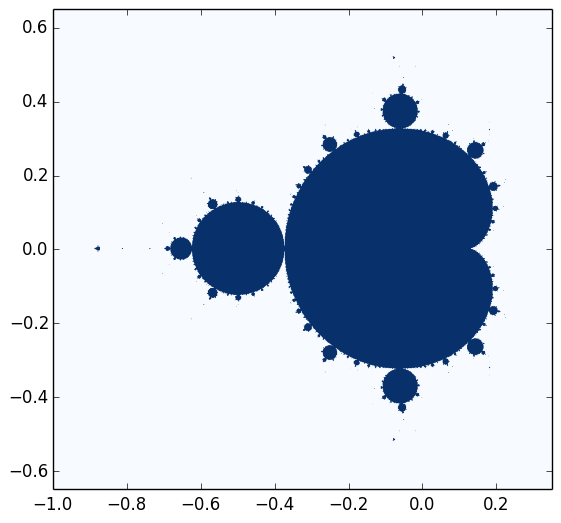

PyObject <matplotlib.image.AxesImage object at 0x31ed19650>

In [24]:
plot_domain(mandelbrot, n=1001)

In [25]:
f1 = ExpFun( (x,y) -> cos(x*y), mandelbrot)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -1.675  ,  1.025 ] x Fourier series, mapped to [ -1.3  ,  1.3 ])
Domain: The Mandelbrot set


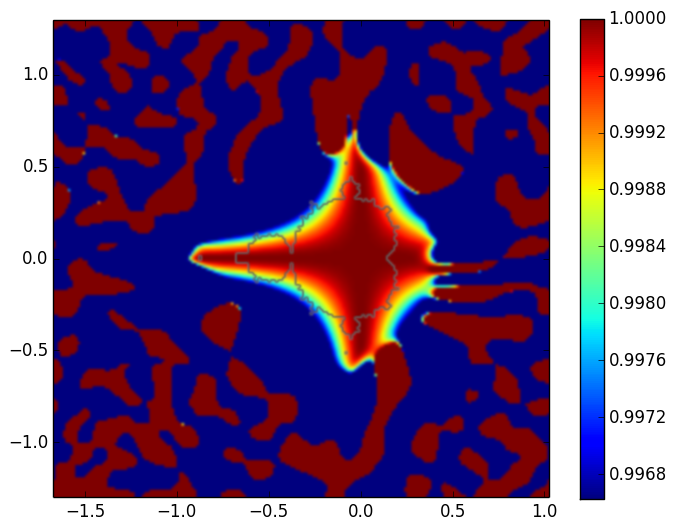

PyObject <matplotlib.colorbar.Colorbar instance at 0x31ebe7ef0>

In [26]:
plot_image(f1,n=201)

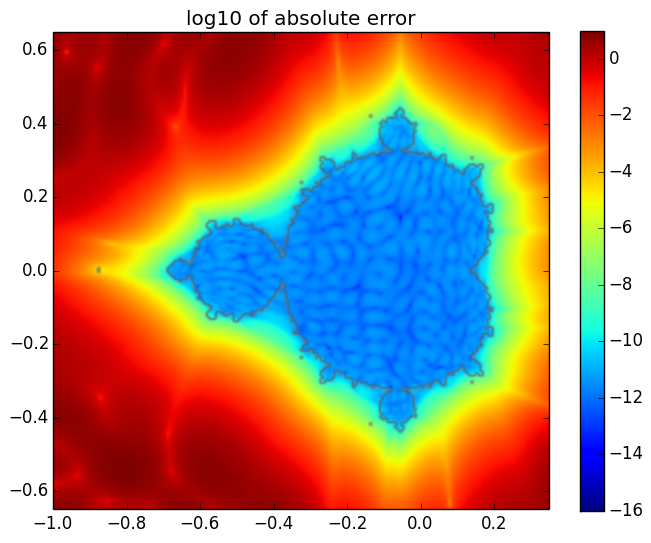

PyObject <matplotlib.text.Text object at 0x320653fd0>

In [27]:
plot_error(f1,(x,y) -> cos(x*y),n=201)

In [28]:
julia = JuliaSet()

A particular Julia Set also known as the Douady rabbit

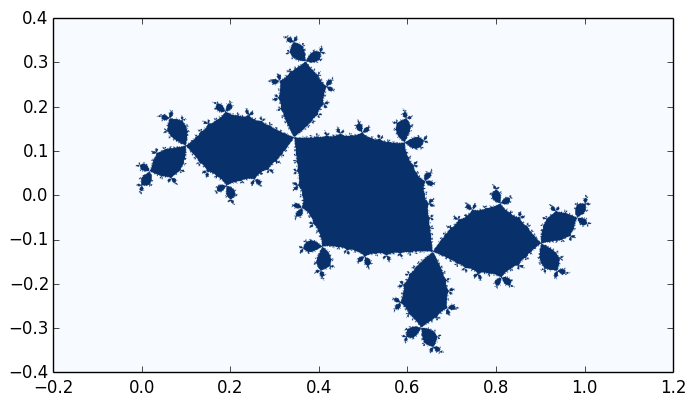

PyObject <matplotlib.image.AxesImage object at 0x31e41ded0>

In [29]:
plot_domain(julia)

In [30]:
f2 = ExpFun( (x,y) -> cos(10*x*y), julia, dof=31)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -0.8999999999999999  ,  1.9 ] x Fourier series, mapped to [ -0.8  ,  0.8 ])
Domain: A particular Julia Set also known as the Douady rabbit


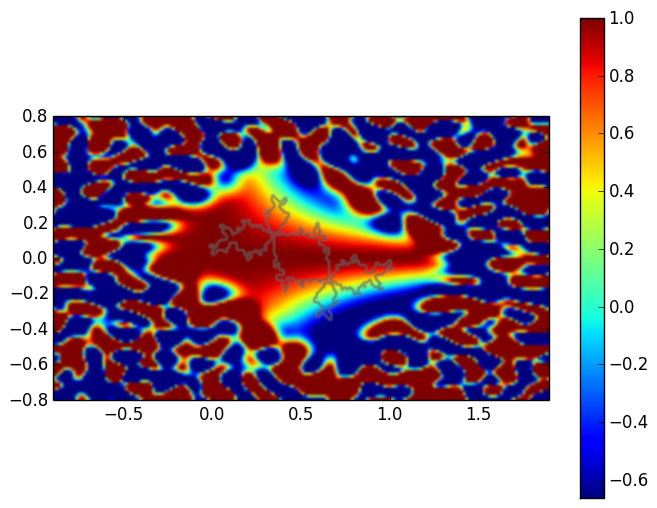

PyObject <matplotlib.colorbar.Colorbar instance at 0x31e188b48>

In [31]:
plot_image(f2)

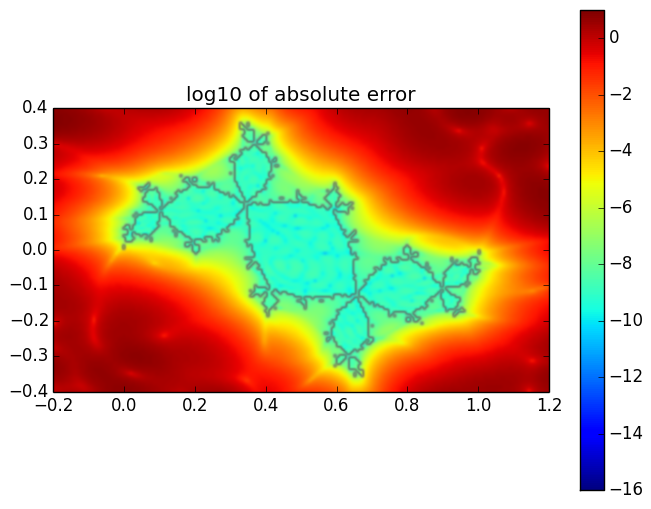

PyObject <matplotlib.text.Text object at 0x31c94ec90>

In [32]:
plot_error(f2, (x,y) -> cos(10*x*y))

In [48]:
points=rand(10,2); methods(FrameFuns.)

LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{FrameFuns.CollectionGrid{N,T}}, ::Array{Float64,2})
This may have arisen from a call to the constructor FrameFuns.CollectionGrid{N,T}(...),
since type constructors fall back to convert methods.
Closest candidates are:
  call{T}(::Type{T}, ::Any)
  convert{T}(::Type{T}, !Matched::T)
while loading In[48], in expression starting on line 1

### 3D approximations

##### Simple domains and simple functions

In [33]:
S = Sphere(1.0)

LoadError: LoadError: UndefVarError: Sphere not defined
while loading In[33], in expression starting on line 1

In [34]:
plot(S)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[34], in expression starting on line 1

In [35]:
f3 = ExpFun( (x,y,z) -> cos(x-2y+3z), Sphere(1.0), dof=5)

LoadError: LoadError: UndefVarError: Sphere not defined
while loading In[35], in expression starting on line 1

In [36]:
plot(f3)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[36], in expression starting on line 1

In [37]:
plotslice(f3)

LoadError: LoadError: UndefVarError: plotslice not defined
while loading In[37], in expression starting on line 1

##### Harder domains

In [38]:
atom = atomium()

LoadError: LoadError: MethodError: `+` has no method matching +(::FixedSizeArrays.Vec{3,Float64}, ::Array{Float64,1})
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)
  +{S,T}(!Matched::Range{S}, ::AbstractArray{T,N})
  +(!Matched::SparseMatrixCSC{Tv,Ti<:Integer}, ::Array{T,N})
  ...
while loading In[38], in expression starting on line 1

In [39]:
plot(atomium, n=50)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[39], in expression starting on line 1

In [40]:
f3 = ExpFun( (x,y,z) -> cos(x+y-2*z), atomium, dof=5)

LoadError: LoadError: MethodError: `numtype` has no method matching numtype(::Function)
while loading In[40], in expression starting on line 1

In [41]:
plot(f3)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[41], in expression starting on line 1

In [42]:
plotslice(f3)

LoadError: LoadError: UndefVarError: plotslice not defined
while loading In[42], in expression starting on line 1

##### Harder functions?

In [43]:
f3 = ExpFun( (x,y,z) -> cos(40*(x+y-2*z)), unitsphere, dof=21, method="lsqr")

LoadError: LoadError: UndefVarError: unitsphere not defined
while loading In[43], in expression starting on line 1

In [44]:
plotslice(f3)

LoadError: LoadError: UndefVarError: plotslice not defined
while loading In[44], in expression starting on line 1

In [45]:
f3 = ExpFun( (x,y,z) -> cos(40*(x+y-2*z)), unitsphere, dof=51, method="lsqr")

LoadError: LoadError: UndefVarError: unitsphere not defined
while loading In[45], in expression starting on line 1